In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import seaborn as sns
import sys
import os
import shutil
import copy

In [2]:
source="Simple Data.zip"
shutil.unpack_archive(source,'./','zip')

In [3]:
Sales_Test="sales_test.csv"
Canceled_Test="canceled_test.csv"
Sales_Df=pd.read_csv(Sales_Test)
Canceled_Df=pd.read_csv(Canceled_Test)

In [4]:
print('Sales:',Sales_Df.shape,'Canceled:',Canceled_Df.shape)

Sales: (28315, 7) Canceled: (3662, 7)


In [5]:
Sales_Df.describe()

,Order No,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
count,28315.000000,28315.000000,2.831500e+04,2.831500e+04,28315.000000,28315.000000
mean,536330.828289,3.548508,8.571873e+06,4.897559e+06,6.471305,6.471305
std,4339.727923,3.388066,1.563677e+07,4.564069e+06,36.203671,36.203671
min,528758.000000,1.000000,1.254612e+06,1.104410e+05,1.000000,1.000000
25%,532522.000000,1.000000,1.255615e+06,1.040725e+06,1.000000,1.000000
50%,536359.000000,2.000000,1.740542e+06,1.041106e+06,1.000000,1.000000
75%,540127.500000,5.000000,2.247534e+06,1.013370e+07,2.000000,2.000000
max,543766.000000,47.000000,4.382536e+07,1.013801e+07,2000.000000,2000.000000


In [6]:
Canceled_Df.describe()

,Order Number,Line Number,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
count,3662.000000,3662.000000,3.662000e+03,3.662000e+03,3662.000000,3662.000000
mean,537084.880393,4.562534,8.950797e+06,6.700760e+06,8.714637,8.714637
std,3498.398809,4.093325,1.600894e+07,4.424588e+06,85.915973,85.915973
min,528703.000000,1.000000,6.299800e+04,1.104410e+05,1.000000,1.000000
25%,534856.000000,1.000000,1.255616e+06,1.040774e+06,1.000000,1.000000
50%,537724.000000,3.000000,1.653099e+06,1.013370e+07,1.000000,1.000000
75%,539391.750000,6.000000,2.246049e+06,1.013536e+07,3.000000,3.000000
max,543491.000000,27.000000,4.382536e+07,1.013801e+07,4500.000000,4500.000000


In [7]:
Sales_Df.head(10)

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0
1,528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
2,528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
3,528791,2017-01-03,3,1254798.0,1040827,5.0,5.0
4,528791,2017-01-03,4,1254798.0,10106111,10.0,10.0
5,528791,2017-01-03,5,1254798.0,10105916,15.0,15.0
6,528791,2017-01-03,6,1254798.0,10106230,15.0,15.0
7,528791,2017-01-03,7,1254798.0,10106229,15.0,15.0
8,528791,2017-01-03,8,1254798.0,1040726,15.0,15.0
9,528791,2017-01-03,9,1254798.0,10098739,550.0,550.0


In [8]:
Canceled_Df.head(10)

,Order Number,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
0,528703,1,2017-01-03,1857566.0,10135139,1,1
1,528705,1,2017-01-03,1857566.0,10135140,1,1
2,528706,2,2017-01-03,1857566.0,10135138,1,1
3,528707,1,2017-01-03,1857566.0,10135132,1,1
4,528708,1,2017-01-03,1857566.0,10135359,1,1
5,528710,1,2017-01-03,1857566.0,10135364,1,1
6,528711,1,2017-01-03,1857566.0,10135358,1,1
7,528712,1,2017-01-03,1857566.0,10133703,1,1
8,528713,1,2017-01-03,1857566.0,10135131,1,1
9,528714,1,2017-01-03,1857566.0,10135363,1,1


#### For initial investiation, there are 64 item-codes in Sales list and 73 item-codes in Canceled list. The following code is to find out 15 item-codes that appear in  Canceled but not in Sales. After that, we can merge Sales and Canceled without losing information

In [9]:
print('Sales item-codes:',Sales_Df['Item Code'].unique().shape[0],'\n''Canceled item-codes:',Canceled_Df['Item Code'].unique().shape[0])

Sales item-codes: 64 
Canceled item-codes: 73


In [10]:
Sales_item=Sales_Df['Item Code'].unique()
Canceled_item=Canceled_Df['Item Code'].unique()
gap=[]
for item in Canceled_item:
    if item not in Sales_item:
        gap.append(item)
add_gap=np.zeros((7,len(gap)),int)
add_gap[4]=gap
add_gap=pd.DataFrame(add_gap.T)
add_gap.columns=Sales_Df.columns
Sales_Df_added=pd.concat([add_gap,Sales_Df],axis=0)
print(add_gap.shape)
print('Before added:',Sales_Df.shape,'After added:',Sales_Df_added.shape)

(15, 7)
Before added: (28315, 7) After added: (28330, 7)


In [11]:
Sale_Canceled=Canceled_Df[['Order Date','Quantity Canceled']].groupby('Order Date').sum().reset_index()
Sale_Canceled_Jan=Sale_Canceled.loc[Sale_Canceled['Order Date']<='2017-01-31']
Sale_Canceled_Feb=Sale_Canceled.loc[Sale_Canceled['Order Date']>'2017-01-31']
Sale_Shipped=Sales_Df[['Order Date','Quantity Shipped']].groupby('Order Date').sum().reset_index()
Sale_Shipped_Jan=Sale_Shipped.loc[Sale_Shipped['Order Date']<='2017-01-31']
Sale_Shipped_Feb=Sale_Shipped.loc[Sale_Shipped['Order Date']>'2017-01-31']

In [12]:

Total_Order=pd.merge(Sale_Shipped,Sale_Canceled,how='left', on='Order Date')
Total_Order=Total_Order.fillna(0)
Total_Order['Total Ordered']=Total_Order['Quantity Shipped']+Total_Order['Quantity Canceled']

In [13]:
Total_Order_Jan=Total_Order.loc[Total_Order['Order Date']<='2017-01-31']
Total_Order_Feb=Total_Order.loc[Total_Order['Order Date']>'2017-01-31']

<Figure size 432x288 with 0 Axes>

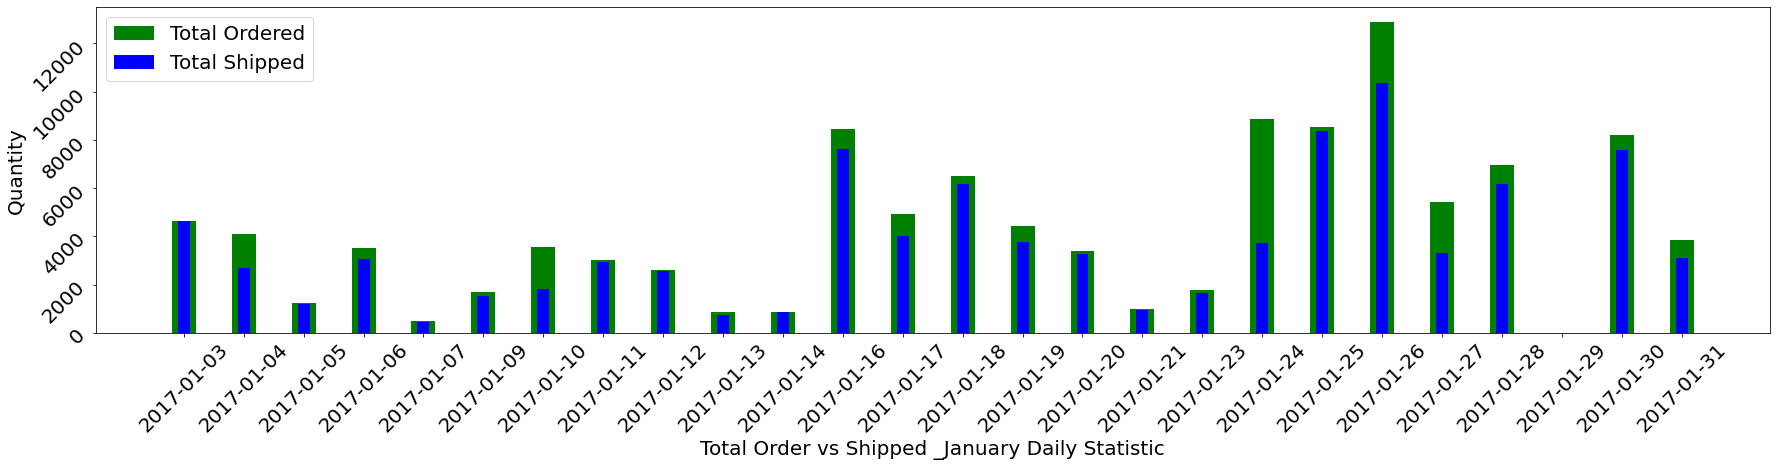

In [14]:
fig = plt.figure()
fig,ax=plt.subplots(figsize=(30,6))
ax.bar(Total_Order_Jan['Order Date'],Total_Order_Jan['Total Ordered'],color='g',width = 0.4,label ='Total Ordered')
ax.bar(Sale_Shipped_Jan['Order Date'],Sale_Shipped_Jan['Quantity Shipped'],color='b',width = 0.2,label = 'Total Shipped')
ax.set_xlabel('Total Order vs Shipped _January Daily Statistic',fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
plt.yticks(rotation=45,fontsize=20)
ax.legend(loc=2,prop={'size': 20})
plt.xticks(rotation=45,fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

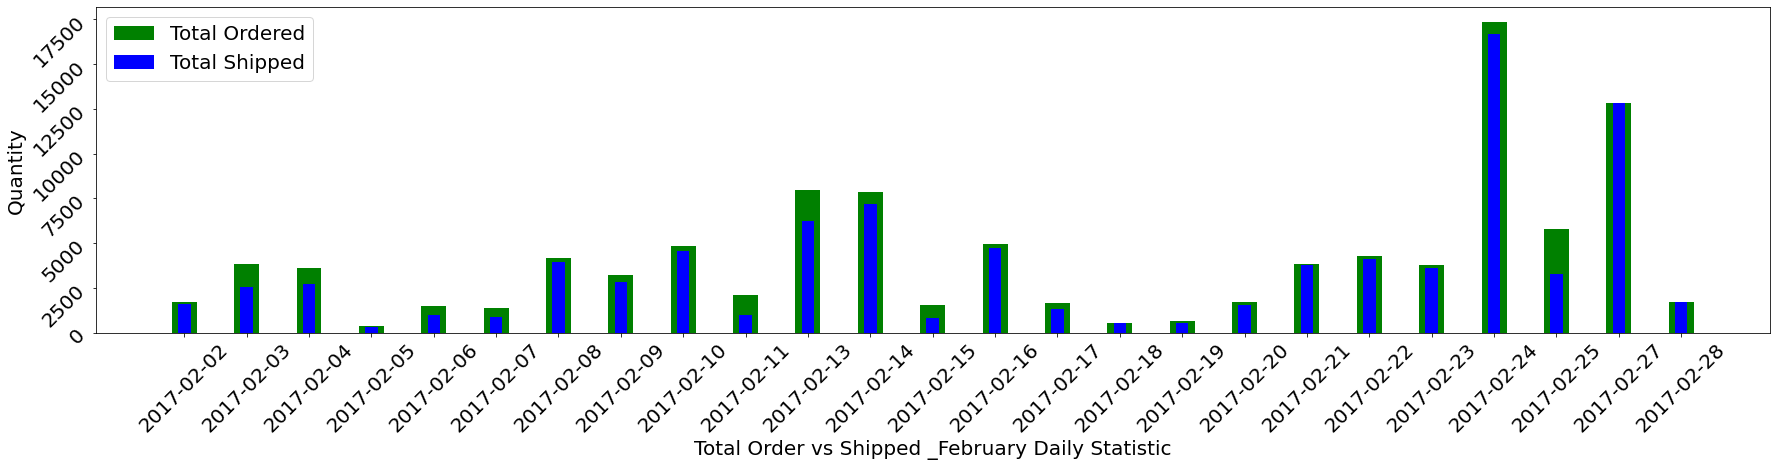

In [15]:
fig = plt.figure()
fig,ax=plt.subplots(figsize=(30,6))
ax.bar(Total_Order_Feb['Order Date'],Total_Order_Feb['Total Ordered'],color='g',width = 0.4,label ='Total Ordered')
ax.bar(Sale_Shipped_Feb['Order Date'],Sale_Shipped_Feb['Quantity Shipped'],color='b',width = 0.2,label = 'Total Shipped')
ax.set_xlabel('Total Order vs Shipped _February Daily Statistic',fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
plt.yticks(rotation=45,fontsize=20)
ax.legend(loc=2,prop={'size': 20})
plt.xticks(rotation=45,fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

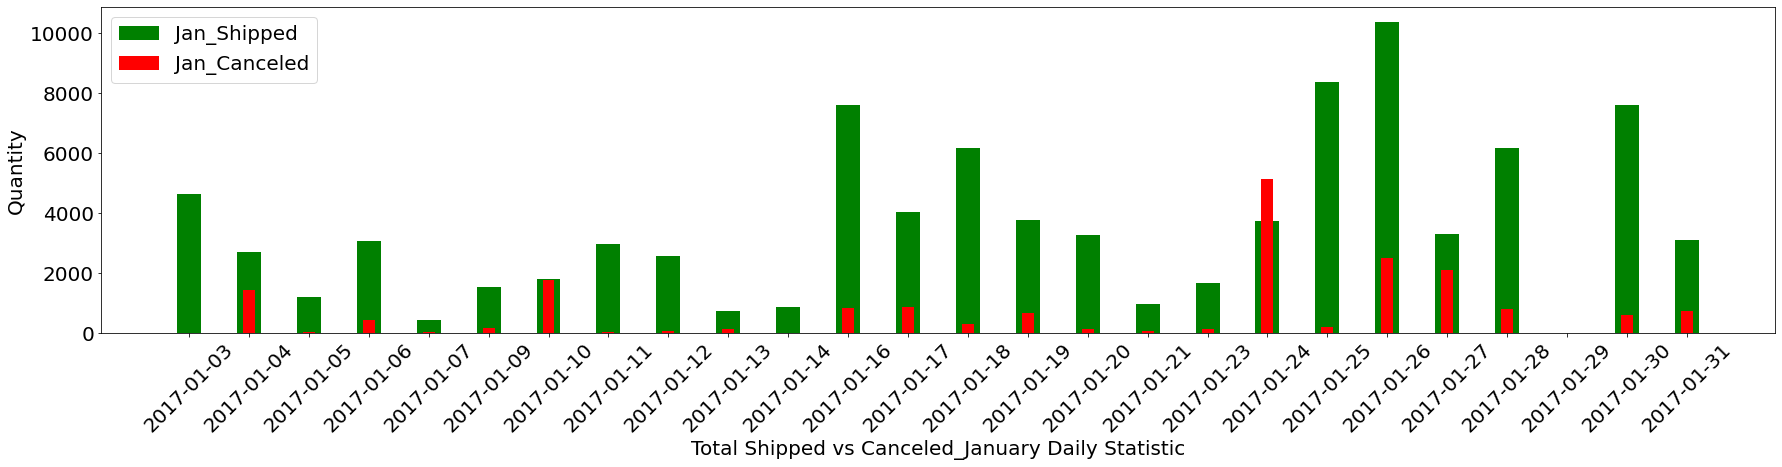

In [16]:
fig = plt.figure()
fig,ax=plt.subplots(figsize=(30,6))
ax.bar(Sale_Shipped_Jan['Order Date'],Sale_Shipped_Jan['Quantity Shipped'],color='g',width = 0.4,label = 'Jan_Shipped')
ax.bar(Sale_Canceled_Jan['Order Date'],Sale_Canceled_Jan['Quantity Canceled'],color='r',width = 0.2, label= 'Jan_Canceled')
ax.set_xlabel('Total Shipped vs Canceled_January Daily Statistic',fontsize=20)
plt.xticks(rotation=45,fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
plt.yticks(rotation=0,fontsize=20)
ax.legend(loc=2,prop={'size': 20})
plt.show()

<Figure size 432x288 with 0 Axes>

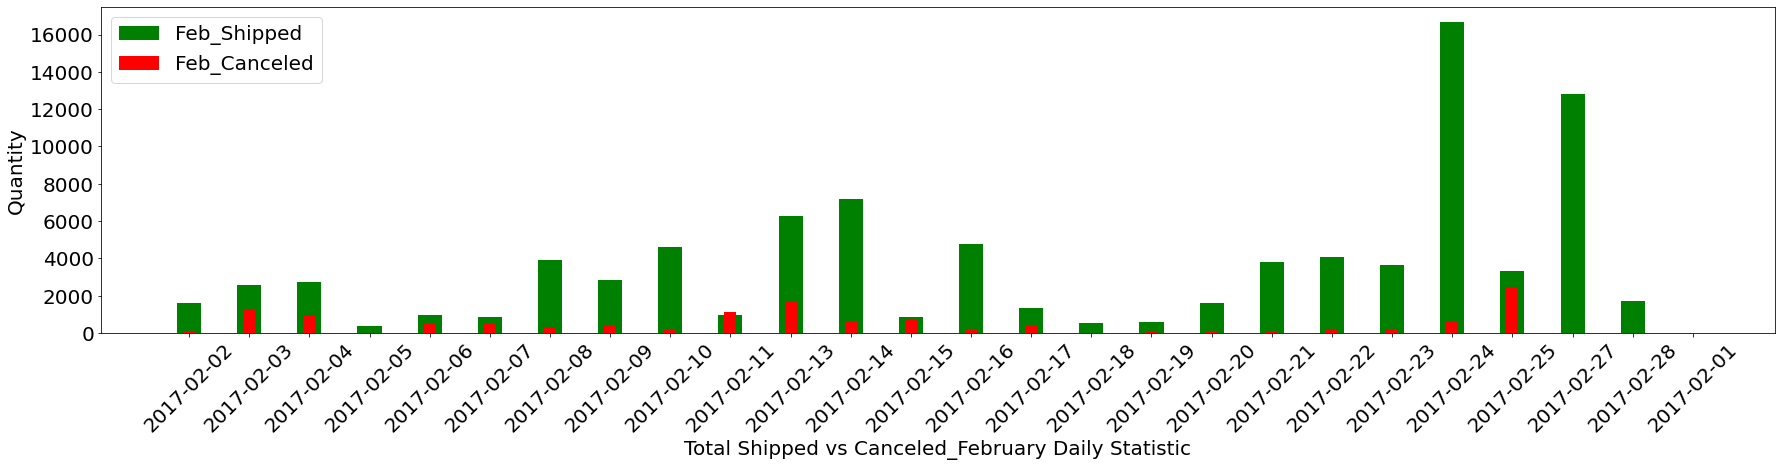

In [17]:
fig = plt.figure()
fig,ax=plt.subplots(figsize=(30,6))
ax.bar(Sale_Shipped_Feb['Order Date'],Sale_Shipped_Feb['Quantity Shipped'],color='g',width = 0.4,label = 'Feb_Shipped')
ax.bar(Sale_Canceled_Feb['Order Date'],Sale_Canceled_Feb['Quantity Canceled'],color='r',width = 0.2, label= 'Feb_Canceled')
ax.set_xlabel('Total Shipped vs Canceled_February Daily Statistic',fontsize=20)
plt.xticks(rotation=45,fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
plt.yticks(rotation=0,fontsize=20)
ax.legend(loc=2,prop={'size': 20})
plt.show()

### We may have some first conclusions:

In [60]:
print('Top 5 days Highest Order:\n',Total_Order[['Order Date','Total Ordered']].sort_values(by=['Total Ordered'],ascending= False).head(5))
print('Top 5 days Lowest Order:\n',Total_Order[['Order Date','Total Ordered']].sort_values(by=['Total Ordered'],ascending= False).tail(5))
print('Top 5 days Highest Shipped:\n',Total_Order[['Order Date','Quantity Shipped']].sort_values(by=['Quantity Shipped'],ascending= False).head(5))
print('Top 5 days Lowest Shipped:\n',Total_Order[['Order Date','Quantity Shipped']].sort_values(by=['Quantity Shipped'],ascending= False).tail(5))
print('Top 5 days Highest Canceled:\n',Total_Order[['Order Date','Quantity Canceled']].sort_values(by=['Quantity Canceled'],ascending= False).head(5))
print('Top 5 days Lowest Canceled:\n',Total_Order[['Order Date','Quantity Canceled']].sort_values(by=['Quantity Canceled'],ascending= False).tail(5))

Top 5 days Highest Order:
     Order Date  Total Ordered
47  2017-02-24        17320.0
20  2017-01-26        12876.0
49  2017-02-27        12808.0
18  2017-01-24         8890.0
19  2017-01-25         8550.0
Top 5 days Lowest Order:
     Order Date  Total Ordered
42  2017-02-19          645.0
41  2017-02-18          541.0
4   2017-01-07          484.0
29  2017-02-05          376.0
23  2017-01-29            9.0
Top 5 days Highest Shipped:
     Order Date  Quantity Shipped
47  2017-02-24           16656.0
49  2017-02-27           12808.0
20  2017-01-26           10363.0
19  2017-01-25            8358.0
11  2017-01-16            7607.0
Top 5 days Lowest Shipped:
     Order Date  Quantity Shipped
42  2017-02-19             581.0
41  2017-02-18             539.0
4   2017-01-07             449.0
29  2017-02-05             361.0
23  2017-01-29               9.0
Top 5 days Highest Canceled:
     Order Date  Quantity Canceled
18  2017-01-24             5140.0
20  2017-01-26             2513.0
48

# ABC Classification base on Item Code (IC):
#### Here we prepare the Item Code wise tables

In [18]:
Sales_IC_Jan=Sales_Df.loc[Sales_Df['Order Date']<='2017-01-31']
Sales_IC_Feb=Sales_Df.loc[Sales_Df['Order Date']>'2017-01-31']
Sales_IC_Jan=Sales_IC_Jan[['Item Code','Order Qty']].groupby('Item Code').sum().reset_index()
Sales_IC_Feb=Sales_IC_Feb[['Item Code','Order Qty']].groupby('Item Code').sum().reset_index()
Canceled_IC_Jan=Canceled_Df.loc[Canceled_Df['Order Date']<='2017-01-31']
Canceled_IC_Feb=Canceled_Df.loc[Canceled_Df['Order Date']>'2017-01-31']
Canceled_IC_Jan=Canceled_IC_Jan[['Item Code','Quantity Ordered']].groupby('Item Code').sum().reset_index()
Canceled_IC_Feb=Canceled_IC_Feb[['Item Code','Quantity Ordered']].groupby('Item Code').sum().reset_index()

In [19]:
Jan_IC_Total=copy.deepcopy(Sales_IC_Jan)
Jan_IC_Total=pd.merge(Jan_IC_Total,Canceled_IC_Jan,how='right', on='Item Code')
Feb_IC_Total=copy.deepcopy(Sales_IC_Feb)
Feb_IC_Total=pd.merge(Feb_IC_Total,Canceled_IC_Feb,how='right', on='Item Code')
Jan_IC_Total=Jan_IC_Total.fillna(0)
Feb_IC_Total=Feb_IC_Total.fillna(0)

In [20]:
Jan_IC_Total['Service_Level(IC)']=(100*Jan_IC_Total['Order Qty']/(Jan_IC_Total['Order Qty']+Jan_IC_Total['Quantity Ordered'])).round(decimals=2)
Jan_IC_Total.columns=['Item Code','Order Qty','Order Canceled','Service_Level %']
Feb_IC_Total['Service_Level(IC)']=(100*Feb_IC_Total['Order Qty']/(Feb_IC_Total['Order Qty']+Feb_IC_Total['Quantity Ordered'])).round(decimals=2)
Feb_IC_Total.columns=['Item Code','Order Qty','Order Canceled','Service_Level %']

In [21]:
def ABC_classification(x):
    if x['Service_Level %']<80:
        return "A"
    elif x['Service_Level %']>95:
        return "C"
    else:
        return "B"

In [22]:
Jan_IC_Total['ABC Classification']=Jan_IC_Total.apply(ABC_classification, axis=1)
Feb_IC_Total['ABC Classification']=Feb_IC_Total.apply(ABC_classification, axis=1)


In [62]:
Total_Canceled=Canceled_Df[['Item Code','Quantity Ordered']].groupby('Item Code').sum().reset_index()
Total_Sales=Sales_Df[['Item Code','Order Qty']].groupby('Item Code').sum().reset_index()
Combined_IC=pd.merge(Total_Sales,Total_Canceled,how='right', on='Item Code')
Combined_IC=Combined_IC.fillna(0)
Combined_IC['Service_Level %']=(100*Combined_IC['Order Qty']/(Combined_IC['Order Qty']+Combined_IC['Quantity Ordered'])).round(decimals=2)

In [64]:
Combined_IC

,Item Code,Order Qty,Quantity Ordered,Service_Level %
0,110441,9600.0,430,95.71
1,111931,15575.0,6315,71.15
2,1029069,188.0,175,51.79
3,1029070,443.0,172,72.03
4,1029071,1361.0,288,82.53
...,...,...,...,...
68,10137995,285.0,23,92.53
69,10137996,1588.0,89,94.69
70,10138004,612.0,51,92.31
71,10138005,274.0,20,93.20


In [66]:
print('Top 5 Item-Code with  Highest SL:\n',Combined_IC[['Item Code','Service_Level %']].sort_values(by=['Service_Level %'],ascending= False).head(5))
print('Top 5 Item-Code with  Lowest SL:\n',Combined_IC[['Item Code','Service_Level %']].sort_values(by=['Service_Level %'],ascending= False).tail(5))
print('Top 5 Item-Code with  Highest Shipment:\n',Combined_IC[['Item Code','Order Qty']].sort_values(by=['Order Qty'],ascending= False).head(5))
print('Top 5 Item-Code with  Lowest Shipment:\n',Combined_IC[['Item Code','Order Qty']].sort_values(by=['Order Qty'],ascending= False).tail(5))
print('Top 5 Item-Code with  Highest Canceled:\n',Combined_IC[['Item Code','Quantity Ordered']].sort_values(by=['Quantity Ordered'],ascending= False).head(5))
print('Top 5 Item-Code with  Lowest Canceled:\n',Combined_IC[['Item Code','Quantity Ordered']].sort_values(by=['Quantity Ordered'],ascending= False).tail(5))

Top 5 Item-Code with  Highest SL:
     Item Code  Service_Level %
52   10133321            99.45
47   10108313            96.66
62   10135364            96.23
0      110441            95.71
9     1038323            95.48
Top 5 Item-Code with  Lowest SL:
     Item Code  Service_Level %
6     1035986              0.0
39   10102559              0.0
38   10102557              0.0
37   10102556              0.0
36   10102551              0.0
Top 5 Item-Code with  Highest Shipment:
     Item Code  Order Qty
35   10098739    27173.0
1      111931    15575.0
32    1041106    13178.0
25    1040765    11980.0
0      110441     9600.0
Top 5 Item-Code with  Lowest Shipment:
     Item Code  Order Qty
21    1040477        0.0
22    1040517        0.0
37   10102556        0.0
38   10102557        0.0
36   10102551        0.0
Top 5 Item-Code with  Highest Canceled:
     Item Code  Quantity Ordered
1      111931              6315
59   10135358              2646
25    1040765              1865
35   1009

In [25]:
Combined_IC['ABC Classification']=Combined_IC.apply(ABC_classification, axis=1)

,Item Code,Order Qty,Quantity Ordered,Service_Level %,ABC Classification
0,110441,9600.0,430,95.71,C
1,111931,15575.0,6315,71.15,A
2,1029069,188.0,175,51.79,A
3,1029070,443.0,172,72.03,A
4,1029071,1361.0,288,82.53,B
...,...,...,...,...,...
68,10137995,285.0,23,92.53,B
69,10137996,1588.0,89,94.69,B
70,10138004,612.0,51,92.31,B
71,10138005,274.0,20,93.20,B


### Classification for Service Level - in both Jan and Feb - Item Code wise:

In [26]:
Combined_IC

,Item Code,Order Qty,Quantity Ordered,Service_Level %,ABC Classification
0,110441,9600.0,430,95.71,C
1,111931,15575.0,6315,71.15,A
2,1029069,188.0,175,51.79,A
3,1029070,443.0,172,72.03,A
4,1029071,1361.0,288,82.53,B
...,...,...,...,...,...
68,10137995,285.0,23,92.53,B
69,10137996,1588.0,89,94.69,B
70,10138004,612.0,51,92.31,B
71,10138005,274.0,20,93.20,B


### Classification for Service Level - January - Item Code wise:

In [27]:
Jan_IC_Total

,Item Code,Order Qty,Order Canceled,Service_Level %,ABC Classification
0,110441,4352.0,213,95.33,C
1,111931,9760.0,6300,60.77,A
2,1029069,188.0,156,54.65,A
3,1029070,430.0,151,74.01,A
4,1029071,1041.0,140,88.15,B
...,...,...,...,...,...
68,10137995,0.0,3,0.00,A
69,10137996,257.0,3,98.85,C
70,10138004,0.0,1,0.00,A
71,10138005,31.0,1,96.88,C


### Classification for Service Level - February - Item Code wise:

In [28]:
Feb_IC_Total

,Item Code,Order Qty,Order Canceled,Service_Level %,ABC Classification
0,110441,5248.0,217,96.03,C
1,111931,5815.0,15,99.74,C
2,1029069,0.0,19,0.00,A
3,1029070,13.0,21,38.24,A
4,1029071,320.0,148,68.38,A
...,...,...,...,...,...
59,10137995,285.0,20,93.44,B
60,10137996,1331.0,86,93.93,B
61,10138004,612.0,50,92.45,B
62,10138005,243.0,19,92.75,B


In [29]:
Summary_2months=Combined_IC.groupby(Combined_IC['ABC Classification']).count()
Summary_2months=Summary_2months.reset_index()
Summary_Jan=Jan_IC_Total.groupby(Jan_IC_Total['ABC Classification']).count()
Summary_Jan=Summary_Jan.reset_index()
Summary_Feb=Feb_IC_Total.groupby(Feb_IC_Total['ABC Classification']).count()
Summary_Feb=Summary_Feb.reset_index()

<Figure size 432x288 with 0 Axes>

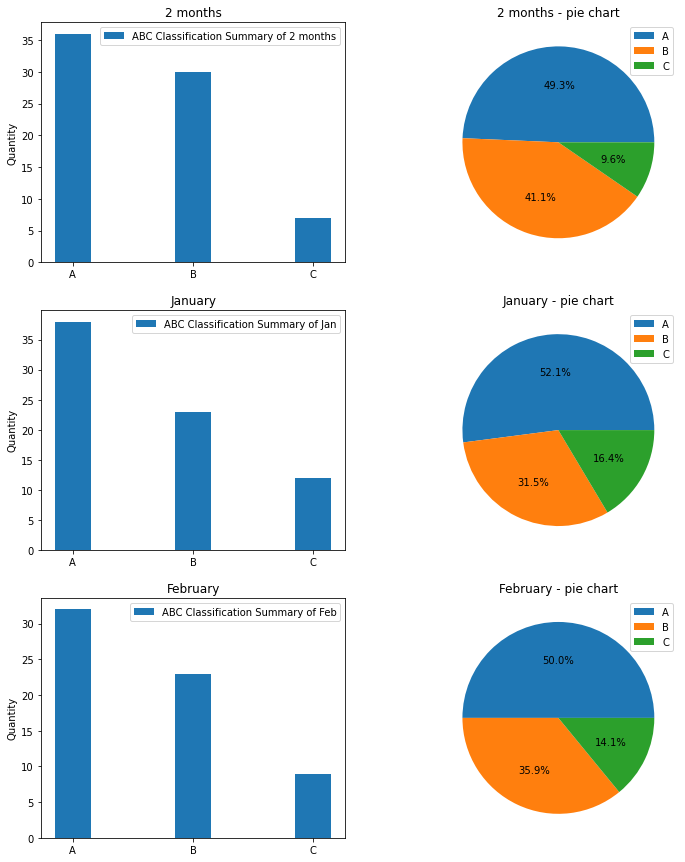

In [30]:
fig = plt.figure()
fig,ax=plt.subplots(3,2,figsize=(12,15))

ax[0][0].bar(list(Summary_2months['ABC Classification']), list(Summary_2months['Service_Level %']),width=0.3,label="ABC Classification Summary of 2 months")
ax[0][0].set(title='2 months')
ax[0][0].legend(loc=1,prop={'size': 10})
ax[0][0].set_ylabel('Quantity',fontsize=10)
ax[0][1].pie(list(Summary_2months['Service_Level %']),autopct='%1.1f%%')
ax[0][1].legend(labels=list(Summary_2months['ABC Classification']),loc=1)
ax[0][1].set(title='2 months - pie chart')
ax[1][0].bar(list(Summary_Jan['ABC Classification']), list(Summary_Jan['Service_Level %']),width=0.3,label="ABC Classification Summary of Jan")
ax[1][0].set(title='January')
ax[1][0].legend(loc=1,prop={'size': 10})
ax[1][0].set_ylabel('Quantity',fontsize=10)
ax[1][1].pie(list(Summary_Jan['Service_Level %']),autopct='%1.1f%%')
ax[1][1].legend(labels=list(Summary_Jan['ABC Classification']),loc=1)
ax[1][1].set(title='January - pie chart')

ax[2][0].bar(list(Summary_Feb['ABC Classification']), list(Summary_Feb['Service_Level %']),width=0.3,label="ABC Classification Summary of Feb")
ax[2][0].set(title='February')
ax[2][0].legend(loc=1,prop={'size': 10})
ax[2][0].set_ylabel('Quantity',fontsize=10)
ax[2][1].pie(list(Summary_Feb['Service_Level %']),autopct='%1.1f%%')
ax[2][1].legend(labels=list(Summary_Feb['ABC Classification']),loc=1)
ax[2][1].set(title='February - pie chart')
plt.show()

# ABC Classification base on Client:

In [31]:
Sales_Df[['Ship To Address No','Order Qty']].groupby('Ship To Address No').sum()

,Order Qty
Ship To Address No,
1254612.0,1407.0
1254686.0,1510.0
1254687.0,356.0
1254688.0,358.0
1254689.0,206.0
...,...
43825209.0,60.0
43825291.0,45.0
43825305.0,2490.0


In [ ]:
Canceled_Df[['Ship To Address No','Quantity Ordered']].groupby('Ship To Address No').sum()